In [1]:
#Assignment 1: Handling Missing Data in an E-Commerce Orders Dataset
#Objective:
#To analyze and clean an e-commerce dataset by identifying and handling missing values using various imputation techniques.

#Instructions:
#Load the provided dataset into Pandas.

#Identify missing data:
#Use isna() and info() functions to detect missing values.
#Compute the percentage of missing values for each column.

#Analyze missing data patterns:
#Determine whether data is MCAR, MAR, or MNAR.
#Visualize missing data patterns using seaborn.heatmap().

#Handle missing values:
#Apply different imputation techniques:
#Mean/Median imputation for numerical columns (e.g., Product_Price).
#Mode imputation for categorical columns (e.g., Product_Category).
#Forward fill or backward fill for date-related fields.
#K-Nearest Neighbors (KNN) imputation for complex cases.

#Evaluate the impact:
#Compare summary statistics before and after imputation.
#Visualize the imputed values using histograms or boxplots.

#Prepare a report:
#Document findings, methods used, and final observations.
#Submit a Jupyter Notebook with the cleaned dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          505 non-null    int64  
 1   Product_Category  481 non-null    object 
 2   Product_Price     485 non-null    float64
 3   Customer_Age      490 non-null    float64
 4   Rating            480 non-null    float64
 5   Review_Text       484 non-null    object 
 6   Order_Date        495 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 27.7+ KB
Percentage of Missing Values for Each Column:
 Order_ID            0.000000
Product_Category    4.752475
Product_Price       3.960396
Customer_Age        2.970297
Rating              4.950495
Review_Text         4.158416
Order_Date          1.980198
dtype: float64


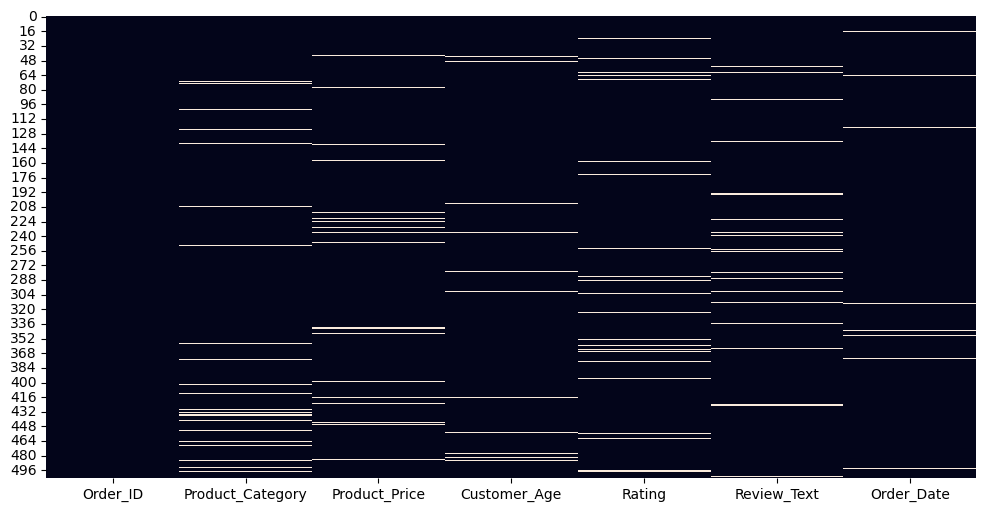

Summary Statistics Before Imputation:
          Order_ID  Product_Price  Customer_Age      Rating  \
count  505.000000     505.000000    490.000000  480.000000   
mean   249.899010    2441.872165     42.144898    3.197917   
std    144.769438    1387.492747     14.901086    1.145198   
min      1.000000     108.000000     18.000000    1.000000   
25%    124.000000    1292.000000     30.000000    2.000000   
50%    250.000000    2441.872165     41.000000    3.000000   
75%    375.000000    3588.000000     55.000000    4.000000   
max    500.000000    4993.000000     69.000000    5.000000   

       Product_Category_Books  Product_Category_Clothing  \
count              505.000000                 505.000000   
mean                 0.209901                   0.198020   
std                  0.407642                   0.398902   
min                  0.000000                   0.000000   
25%                  0.000000                   0.000000   
50%                  0.000000             

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Step 1: Load the Dataset
file_path = r'C:\ML\Day 19_E-Commerce_Data.csv'
df = pd.read_csv(file_path)

# Step 2: Identify Missing Data
missing_values = df.isna()
df.info()
missing_percentage = df.isna().mean() * 100
print("Percentage of Missing Values for Each Column:\n", missing_percentage)

# Step 3: Analyze Missing Data Patterns
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False)
plt.show()

# Step 4: Handle Missing Values

# Mean/Median Imputation for Numerical Columns
df['Product_Price'].fillna(df['Product_Price'].mean(), inplace=True)

# Mode Imputation for Categorical Columns
df['Product_Category'].fillna(df['Product_Category'].mode()[0], inplace=True)

# Forward Fill or Backward Fill for Date-Related Fields
df['Order_Date'].fillna(method='ffill', inplace=True)
df['Order_Date'].fillna(method='bfill', inplace=True)

# Convert all categorical variables to numerical using one-hot encoding
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# K-Nearest Neighbors (KNN) Imputation for Complex Cases
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Step 5: Evaluate the Impact

# Compare Summary Statistics Before and After Imputation
before_imputation = df.describe()
after_imputation = df_imputed.describe()
print("Summary Statistics Before Imputation:\n", before_imputation)
print("Summary Statistics After Imputation:\n", after_imputation)

# Visualize the Imputed Values
df_imputed.hist(figsize=(12, 12))
plt.show()
df_imputed.boxplot(figsize=(12, 12))
plt.show()
